# 用户画像 

从消费历史数据中求出每位用户的 R、F、M 的值，这就好像给用户贴上了一堆数字化的标签。

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


## 数据预处理

### 导入数据

In [23]:
df_sales = pd.read_csv('./flower-express-order.csv', encoding='utf-8')
df_sales.head()

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
0,536374,21258,6/1/2020 9:09,五彩玫瑰五支装,32,10.95,15100,北京
1,536376,22114,6/1/2020 9:32,茉莉花白色25枝,48,3.45,15291,上海
2,536376,21733,6/1/2020 9:32,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海
3,536378,22386,6/1/2020 9:37,百合粉色10花苞,10,1.95,14688,北京
4,536378,85099C,6/1/2020 9:37,橙黄香槟色康乃馨,10,1.95,14688,北京


### 数据可视化

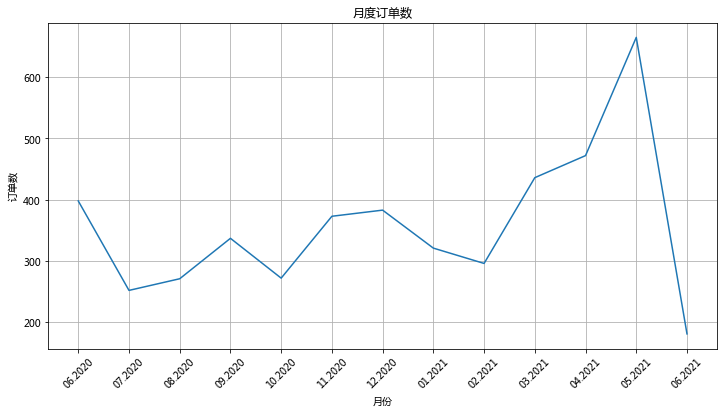

In [24]:
#构建月度的订单数的DataFrame
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])
df_orders_monthly = df_sales.set_index('消费日期')['订单号'].resample('M').nunique()
ax = pd.DataFrame(df_orders_monthly.values).plot(grid=True,figsize=(12,6),legend=False)
ax.set_xlabel('月份')
ax.set_ylabel('订单数')
ax.set_title('月度订单数')

#设定X轴月份显示格式
plt.xticks(
    range(len(df_orders_monthly.index)), 
    [x.strftime('%m.%Y') for x in df_orders_monthly.index], 
    rotation=45)
plt.show()

In [25]:
?plt.xticks

Signature: plt.xticks(ticks=None, labels=None, **kwargs)
Docstring:
Get or set the current tick locations and labels of the x-axis.

Pass no arguments to return the current values without modifying them.

Parameters
----------
ticks : array-like, optional
    The list of xtick locations.  Passing an empty list removes all xticks.
labels : array-like, optional
    The labels to place at the given *ticks* locations.  This argument can
    only be passed if *ticks* is passed as well.
**kwargs
    `.Text` properties can be used to control the appearance of the labels.

Returns
-------
locs
    The list of xtick locations.
labels
    The list of xlabel `.Text` objects.

Notes
-----
Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
the current axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_xticks` and `~.Axes.set_xticklabels` on the current axes.

Exam

### 数据清洗

In [26]:
df_sales.isna().sum()

订单号     0
产品码     0
消费日期    0
产品说明    0
数量      0
单价      0
用户码     0
城市      0
dtype: int64

In [27]:
df_sales = df_sales.drop_duplicates()

**查看数据的统计信息，发现数据异常**

In [28]:
df_sales.describe()

,数量,单价,用户码
count,85920.000000,85920.000000,85920.000000
mean,10.115747,3.599711,15338.080389
std,49.114285,134.410498,391.309086
min,-9360.000000,0.000000,14681.000000
25%,2.000000,1.250000,15022.000000
50%,4.000000,1.950000,15334.000000
75%,12.000000,3.750000,15673.000000
max,3114.000000,38970.000000,16019.000000


发现一些异常数据，比如数量的最小值居然是负值。

**进一步清洗数据**

In [29]:
df_sales[df_sales['数量'] < 0]

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市
57,C536383,35004C,2020-06-01 09:49:00,产品说明掩码,-1,4.65,15311,上海
534,C536625,22839,2020-06-02 10:46:00,产品说明掩码,-2,14.95,14766,北京
698,C536737,22798,2020-06-02 13:05:00,产品说明掩码,-2,2.95,15922,广州
718,C536757,84347,2020-06-02 14:23:00,产品说明掩码,-9360,0.03,15838,深圳
965,C536807,22501,2020-06-02 16:45:00,产品说明掩码,-2,9.95,15834,深圳
...,...,...,...,...,...,...,...,...
87066,C581465,22171,2021-06-08 18:59:00,产品说明掩码,-1,8.50,15755,苏州
87067,C581465,21876,2021-06-08 18:59:00,产品说明掩码,-4,1.65,15755,苏州
87068,C581465,20914,2021-06-08 18:59:00,产品说明掩码,-3,2.95,15755,苏州
87114,C581499,M,2021-06-09 10:28:00,产品说明掩码,-1,224.69,15498,成都


In [30]:
df_sales = df_sales.loc[df_sales['数量'] > 0]

### 特征工程

计算每订单的总价

In [31]:
df_sales['总价'] = df_sales['数量'] * df_sales['单价']
df_sales.head()

,订单号,产品码,消费日期,产品说明,数量,单价,用户码,城市,总价
0,536374,21258,2020-06-01 09:09:00,五彩玫瑰五支装,32,10.95,15100,北京,350.4
1,536376,22114,2020-06-01 09:32:00,茉莉花白色25枝,48,3.45,15291,上海,165.6
2,536376,21733,2020-06-01 09:32:00,教师节向日葵3枝尤加利5枝,64,2.55,15291,上海,163.2
3,536378,22386,2020-06-01 09:37:00,百合粉色10花苞,10,1.95,14688,北京,19.5
4,536378,85099C,2020-06-01 09:37:00,橙黄香槟色康乃馨,10,1.95,14688,北京,19.5


## 求 RFM

### 构建用户表

In [32]:
df_user = pd.DataFrame(df_sales['用户码'].unique())
df_user.columns = ['用户码']
df_user = df_user.sort_values(by='用户码', ascending=True).reset_index(drop=True)
df_user

,用户码
0,14681
1,14682
2,14684
3,14687
4,14688
...,...
975,16015
976,16016
977,16017
978,16018


In [33]:
?df_user.reset_index

Signature:
df_user.reset_index(
    level: Union[Hashable, Sequence[Hashable], NoneType] = None,
    drop: bool = False,
    inplace: bool = False,
    col_level: Hashable = 0,
    col_fill: Union[Hashable, NoneType] = '',
) -> Union[ForwardRef('DataFrame'), NoneType]
Docstring:
Reset the index, or a level of it.

Reset the index of the DataFrame, and use the default one instead.
If the DataFrame has a MultiIndex, this method can remove one or more
levels.

Parameters
----------
level : int, str, tuple, or list, default None
    Only remove the given levels from the index. Removes all levels by
    default.
drop : bool, default False
    Do not try to insert index into dataframe columns. This resets
    the index to the default integer index.
inplace : bool, default False
    Modify the DataFrame in place (do not create a new object).
col_level : int or str, default 0
    If the columns have multiple levels, determines which level the
    labels are inserted into. By default it is inse

### 求 R 值

使用最新时间 - 最近一次消费时间。R值越大，说明用户处于休眠态，很可能已经被别的购物平台所吸引了，也就是流失了。

In [34]:
df_sales['消费日期'] = pd.to_datetime(df_sales['消费日期'])
# 找出每个用户的最近一条消费记录
df_recent_buy = df_sales.groupby('用户码').消费日期.max().reset_index()
df_recent_buy.columns = ['用户码','最近日期']
# 计算最新日期与用户最近一次消费日期的天数: timedelta.days
df_recent_buy['R值'] = (df_recent_buy['最近日期'].max() - df_recent_buy['最近日期']).dt.days
# df_recent_buy
# 合并最近一条消费记录到 df_user
df_user = pd.merge(df_user, df_recent_buy[['用户码','R值']], on='用户码')
df_user.head()

,用户码,R值
0,14681,70
1,14682,187
2,14684,25
3,14687,106
4,14688,7


### 求 F 值

每个用户的消费次数


In [35]:
df_frequency = df_sales.groupby('用户码').消费日期.count().reset_index()
df_frequency.columns = ['用户码','F值']
# 把消费频率整合至df_user结构
df_user = pd.merge(df_user, df_frequency, on='用户码')
df_user.head()

,用户码,R值,F值
0,14681,70,7
1,14682,187,2
2,14684,25,390
3,14687,106,15
4,14688,7,324


### 求 M 值

用户消费的总和。

In [36]:
df_revenue = df_sales.groupby('用户码').总价.sum().reset_index()
df_revenue.columns = ['用户码','M值']
# 把消费金额整合至df_user结构
df_user = pd.merge(df_user, df_revenue, on='用户码')
df_user.head()

,用户码,R值,F值,M值
0,14681,70,7,498.95
1,14682,187,2,52.00
2,14684,25,390,1201.51
3,14687,106,15,628.38
4,14688,7,324,5579.10


### 显示R、F、M值的分布情况

分析新进用户

<AxesSubplot:title={'center':'新进度分布直方图'}, ylabel='Frequency'>

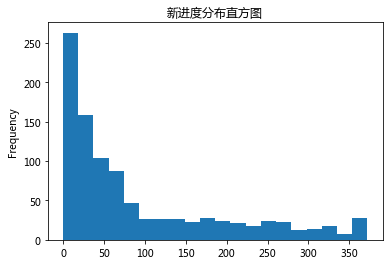

In [37]:
df_user['R值'].plot(kind='hist', bins=20, title = '新进度分布直方图')

消费频率

<AxesSubplot:title={'center':'消费频率分布直方图'}, ylabel='Frequency'>

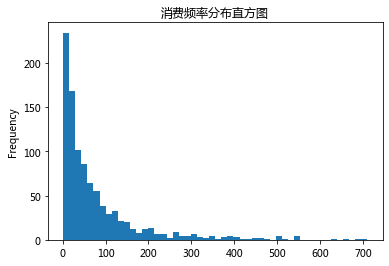

In [38]:
df_user.query('F值 < 800')['F值'].plot(kind='hist', bins=50, title='消费频率分布直方图')

消费金额

<AxesSubplot:title={'center':'消费金额分布直方图'}, ylabel='Frequency'>

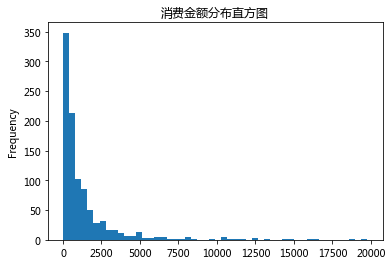

In [39]:
df_user.query('M值 < 20000')['M值'].plot(kind='hist', bins=50, title='消费金额分布直方图')